In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#2015 data
df_15 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
usecols = ['Rank','Country','Score','GDP','Support',
                'Health','Freedom','Generosity','Corruption']
df_15.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True) 
df_15.columns = ['Country','Rank','Score','Support',
                'GDP','Health',
                'Freedom','Generosity','Corruption']
df_15['Year'] = 2015 #add year column
df_15.head()

Country  Rank  Score  Support      GDP   Health  Freedom  Generosity  \
0  Switzerland     1  7.587  1.39651  1.34951  0.94143  0.66557     0.41978   
1      Iceland     2  7.561  1.30232  1.40223  0.94784  0.62877     0.14145   
2      Denmark     3  7.527  1.32548  1.36058  0.87464  0.64938     0.48357   
3       Norway     4  7.522  1.45900  1.33095  0.88521  0.66973     0.36503   
4       Canada     5  7.427  1.32629  1.32261  0.90563  0.63297     0.32957   

   Corruption  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015

In [3]:
target = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
target_n = [4, 3, 2, 1]
df_15["target"] = pd.qcut(df_15['Rank'], len(target), labels=target)
df_15["target_n"] = pd.qcut(df_15['Rank'], len(target), labels=target_n)

In [4]:
finaldf = df_15.append([])
finaldf.isnull().any()
finaldf.Corruption.fillna((finaldf.Corruption.mean()), inplace = True)
finaldf.head(10)

Country  Rank  Score  Support      GDP   Health  Freedom  Generosity  \
0  Switzerland     1  7.587  1.39651  1.34951  0.94143  0.66557     0.41978   
1      Iceland     2  7.561  1.30232  1.40223  0.94784  0.62877     0.14145   
2      Denmark     3  7.527  1.32548  1.36058  0.87464  0.64938     0.48357   
3       Norway     4  7.522  1.45900  1.33095  0.88521  0.66973     0.36503   
4       Canada     5  7.427  1.32629  1.32261  0.90563  0.63297     0.32957   
5      Finland     6  7.406  1.29025  1.31826  0.88911  0.64169     0.41372   
6  Netherlands     7  7.378  1.32944  1.28017  0.89284  0.61576     0.31814   
7       Sweden     8  7.364  1.33171  1.28907  0.91087  0.65980     0.43844   
8  New Zealand     9  7.286  1.25018  1.31967  0.90837  0.63938     0.42922   
9    Australia    10  7.284  1.33358  1.30923  0.93156  0.65124     0.35637   

   Corruption  Year target target_n  
0     0.29678  2015    Top        4  
1     0.43630  2015    Top        4  
2     0.34139  2015    Top        4  
3     0.34699  2015    Top        4  
4     0.45811  2015    Top        4  
5     0.23351  2015    Top        4  
6     0.47610  2015    Top        4  
7     0.36262  2015    Top        4  
8     0.47501  2015    Top        4  
9     0.43562  2015    Top        4

In [5]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

In [7]:
pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239953 sha256=2570ffae9853142f0a169dc97eb509f88fcf3352381ea1197f733186432b61d0
  Stored in directory: C:\Users\hp\AppData\Local\Temp\pip-ephem-wheel-cache-tq83fgox\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.10.0
    Uninstalling pandas-profiling-2.10.0:
      Successfully uninstalled pandas-profiling-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
profile = ProfileReport(df_15,title="Pandas Profiling Report 2015", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

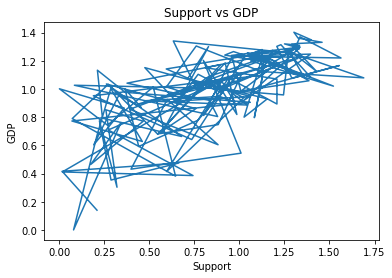

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_15['Support'],df_15['GDP'])
plt.title('Support vs GDP')
plt.xlabel('Support')
plt.ylabel('GDP')
plt.show()

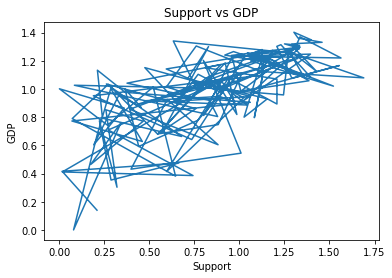

In [14]:
plt.plot(df_15['Support'],df_15['GDP'])
plt.title('Support vs GDP')
plt.xlabel('Support')
plt.ylabel('GDP')
plt.show()

In [16]:
df_15.groupby('Country')['Support'].mean()

Country
Afghanistan    0.31982
Albania        0.87867
Algeria        0.93929
Angola         0.75778
Argentina      1.05351
                ...   
Venezuela      1.04424
Vietnam        0.63216
Yemen          0.54649
Zambia         0.47038
Zimbabwe       0.27100
Name: Support, Length: 158, dtype: float64

In [18]:
df_15[['Country','Support']].sort_values(by=['Support'], ascending=False)

Country  Support
27              Qatar  1.69042
16         Luxembourg  1.56391
38             Kuwait  1.55422
23          Singapore  1.52186
3              Norway  1.45900
..                ...      ...
115           Liberia  0.07120
143             Niger  0.06940
130            Malawi  0.01604
156           Burundi  0.01530
119  Congo (Kinshasa)  0.00000

[158 rows x 2 columns]

In [19]:
df_15[df_15['Country']=='Switzerland']

Country  Rank  Score  Support      GDP   Health  Freedom  Generosity  \
0  Switzerland     1  7.587  1.39651  1.34951  0.94143  0.66557     0.41978   

   Corruption  Year target target_n  
0     0.29678  2015    Top        4

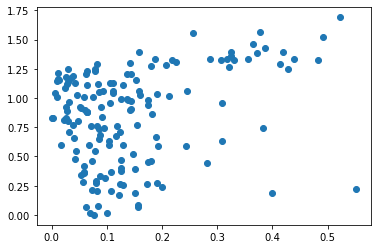

In [20]:
plt.scatter(df_15['Generosity'],df_15['Support'])